In [25]:
import pandas as pd

birddata = pd.read_csv('bird_tracking.csv')

birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


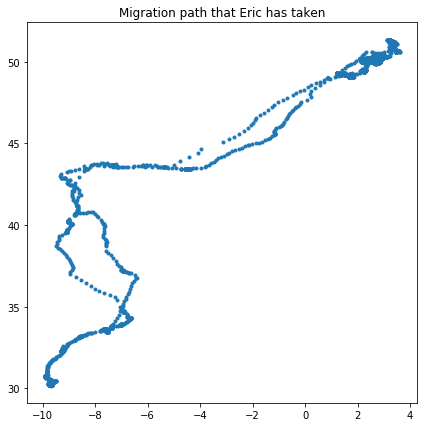

In [26]:
import matplotlib.pyplot as plt
import numpy as np

eric = birddata.bird_name == 'Eric'
x, y = birddata.longitude[eric], birddata.latitude[eric]

# Plotting flight trajectory.
plt.figure(figsize=(7,7))
plt.plot(x, y, ".")
plt.title("Migration path that Eric has taken")
plt.show()

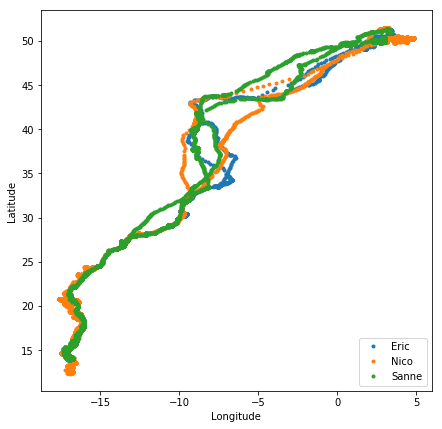

In [27]:
birdnames = pd.unique(birddata.bird_name)
plt.figure(figsize=(7,7))

for birdname in birdnames:
    iloc = birddata.bird_name == birdname
    x, y = birddata.longitude[iloc], birddata.latitude[iloc]
    plt.plot(x, y, ".", label=birdname)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")
plt.show()

/home/maharshi/.venv/ds/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/home/maharshi/.venv/ds/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.

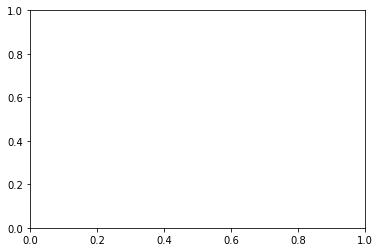

In [30]:
# Examining flight speed
speed = birddata.speed_2d[eric]
plt.hist(speed)

In [32]:
speed[:10]

0    0.150000
1    2.438360
2    0.596657
3    0.310161
4    0.193132
5    2.904772
6    3.080584
7    2.199659
8    2.640076
9    4.592211
Name: speed_2d, dtype: float64

(array([3., 1., 0., 0., 1., 2., 2., 0., 0., 1.]),
 array([0.15      , 0.59422108, 1.03844216, 1.48266324, 1.92688432,
        2.3711054 , 2.81532648, 3.25954756, 3.70376864, 4.14798972,
        4.5922108 ]),
 <a list of 10 Patch objects>)

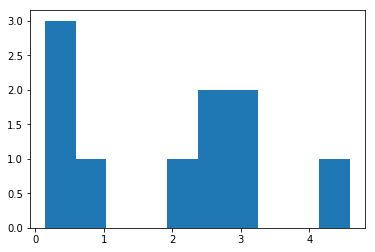

In [35]:
plt.hist(speed[:10])

In [39]:
# Lets clean data
np.isnan(speed).any()

True

In [41]:
# Find how many NAN we have in the array
np.sum(np.isnan(speed))

85

In [43]:
ind = np.isnan(speed)
ind[:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: speed_2d, dtype: bool

In [45]:
# Bitwise operator that turns True to a False and vice versa
~ind[:10]

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: speed_2d, dtype: bool

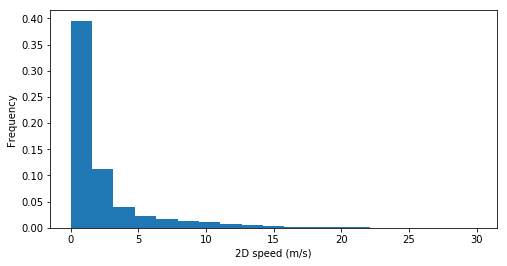

In [49]:
plt.figure(figsize=(8,4))
plt.hist(speed[~ind], bins=np.linspace(0, 30, 20), density=True)
plt.xlabel("2D speed (m/s)")
plt.ylabel("Frequency")
plt.show()

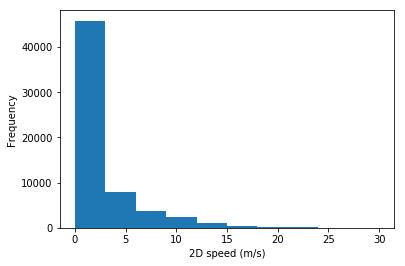

In [51]:
# *benefit of using Pandas ; It handles NAN's under the hood
birddata.speed_2d.plot(kind="hist", range=[0, 30])
plt.xlabel("2D speed (m/s)")
plt.show()

In [53]:
# Knowing how much time has elasped between two time stamps
birddata.date_time[:3]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
Name: date_time, dtype: object

In [59]:
import datetime

timestamps = []
for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime(birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))
timestamps[:3]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58)]

In [60]:
birddata['timestamp'] = pd.Series(timestamps, index = birddata.index)
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [64]:
times = birddata.timestamp[birddata.bird_name == 'Eric']
elapsed_time = [time - times[0] for time in times]
len(elapsed_time)

19795

In [67]:
elapsed_time[1500]

Timedelta('18 days 03:02:21')

In [69]:
elapsed_time[1500] / datetime.timedelta(days=1)

18.126631944444444

In [71]:
elapsed_time[1500] / datetime.timedelta(hours=1)

435.0391666666667

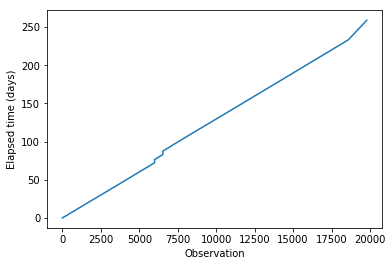

In [75]:
plt.plot(np.array(elapsed_time) / datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time (days)")
plt.savefig("timestamps.pdf")
plt.show()

In [83]:
# Calculating Daily Mean Speed
data =  birddata[birddata.bird_name == "Eric"]
times = data.timestamp
elapsed_time = [time-times[0] for time in times]
elapsed_days = np.array(elapsed_time)/datetime.timedelta(days=1)

next_day = datetime.timedelta(days=1)
inds = []
daily_mean_speed = []

for (i, t) in enumerate(elapsed_time):
    if t < next_day:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day += datetime.timedelta(days=1)
        inds = []
        
daily_mean_speed[:3]

[2.1215165136192446, 2.6191052366952783, 1.7863149983905402]

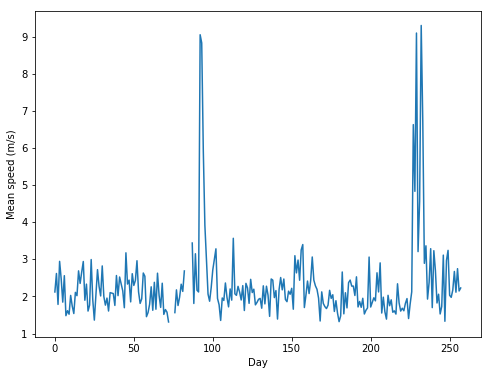

In [85]:
plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean speed (m/s)")
plt.savefig("daily_mean_speed.pdf")
plt.show()